#  Data Visualization
## Introduction

This chapter will teach you how to visualise your data using `seaborn`. Python has several systems for making graphs, but `seaborn` is one of the most elegant and most versatile. With `seaborn`, you can do more faster by learning one system and applying it in many places.

In this chapter we'll cover a variety of important plots:

1. Relational
1. Categorical
1. Distributions
1. Regressions

### Prerequisites

To access the datasets, documentation, and functions that we will use in this chapter, load the packages by running this code:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The above lines of code load the; packages which you will use in almost every data analysis.

If you run this code and get the error message:

```
ImportError: No module named 'XXX'
```
you’ll need to first install it, then run the above code once again.

You only need to install a package once, but you need to reload it every time you start a new session.

If we need to be explicit about where a function (or dataset) comes from, we’ll use the special form 

```python
from package import function
```

For example,

```python
from seaborn import relplot
```

tells you explicitly that we’re using the `relplot()` function from the `seaborn` package.

## First steps

Let’s use our first graph to answer a question: Do cars with big engines use more fuel than cars with small engines? You probably already have an answer, but try to make your answer precise. What does the relationship between engine size and fuel efficiency look like? Is it positive? Negative? Linear? Nonlinear?


### The `mpg` data frame

You can test your answer with the `mpg` data frame found in seaborn. A data frame is a rectangular collection of variables/features (in the columns) and observations (in the rows). `mpg` contains observations collected by the US Environmental Protection Agency on 38 models of car.

In [2]:
#!pip3 install plotnine

In [3]:
from plotnine.data import mpg

In [56]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


# Relational

Among the variables in mpg are:

1. `displ`, a car’s engine size, in litres.

2. `hwy`, a car’s fuel efficiency on the highway, in miles per gallon (mpg). A car with a low fuel efficiency consumes more fuel than a car with a high fuel efficiency when they travel the same distance.

### Creating a plot

To plot `mpg`, run this code to put `displ` on the x-axis and `hwy` on the y-axis:

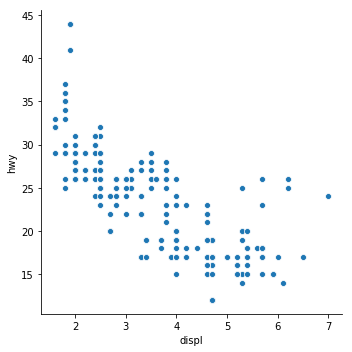

In [5]:
sns.relplot(x="displ",y="hwy", data=mpg);

The plot shows a negative relationship between engine size (`displ`) and fuel efficiency (`hwy`). In other words, cars with big engines use more fuel. Does this confirm or refute your hypothesis about fuel efficiency and engine size?

With `seaborn`, you begin a plot with `sns.`. 

### Graphing template

Let's turn this code into a reusable template for making graphs with seaborn. To make a graph, replace the bracketed sections in the code below with a dataset, a graphing method, or a collection of arguments. For more information see the [Seaborn API Documentation](https://seaborn.pydata.org/api.html).

```python
sns.<GRAPH_METHOD>(<ARGUMENTS>)
```

The rest of this chapter will show you how to complete and extend this template to make different types of graphs. We will begin with the `<ARGUMENTS>` component.

The primary arguments are:

| argument     | description                                                                                                                                                                                      |
|--------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **data**     | DataFrame Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.                                                                                           |
| **kind**     | string, optional Kind of plot to draw, corresponding to a seaborn relational plot. Options are {scatter  and line }.                                                                     |
| **x, y**     | names of variables in **data**  Input data variables; must be numeric                                                                                                                            |
| **hue**      | name in data , optional Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case. |
| **size**     | name in data , optional Grouping variable that will produce elements with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.   |
| **style**    | name in data , optional Grouping variable that will produce elements with different styles. Can have a numeric dtype but will always be treated as categorical.                                  |
| **row, col** | names of variables in data , optional Categorical variables that will determine the faceting of the grid.                                                                                        |


### Exercises

1. How many rows are in mpg? How many columns?
    - HINT:
```python
mpg.info()
```
1. What does the `drv` variable describe?

1. Make a scatterplot of `hwy` vs `cyl`.

1. What happens if you make a scatterplot of `class` vs `drv`? Why is the plot not useful?


## Aesthetic mappings

In the plot below, one group of points (highlighted in red) seems to fall outside of the linear trend. These cars have a higher mileage than you might expect. How can you explain these cars?

[graphic here]


Let’s hypothesize that the cars are hybrids. One way to test this hypothesis is to look at the class value for each car. The class variable of the mpg dataset classifies cars into groups such as compact, midsize, and SUV. If the outlying points are hybrids, they should be classified as compact cars or, perhaps, subcompact cars (keep in mind that this data was collected before hybrid trucks and SUVs became popular).


You can add a third variable, like class, to a two dimensional scatterplot by mapping it to an aesthetic. An aesthetic is a visual property of the objects in your plot. Aesthetics include things like the size, the shape, or the `hue` of your points. You can display a point (like the one below) in different ways by changing the values of its aesthetic properties. Since we already use the word “value” to describe data, let’s use the word “level” to describe aesthetic properties. Here we change the levels of a point’s size, shape, and `hue` to make the point small, triangular, or blue:

[graphic here]

You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset. For example, you can map the `hue`s of your points to the class variable to reveal the class of each car.


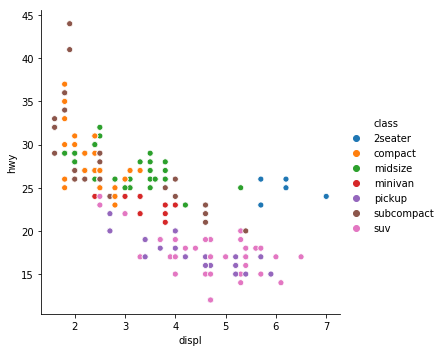

In [6]:
sns.relplot(x="displ",y="hwy", hue="class", data=mpg);

To map an aesthetic to a variable, associate the name of the aesthetic to the name of the variable. seaborn will automatically assign a unique level of the aesthetic (here a unique color) to each unique value of the variable, a process known as scaling. seaborn will also add a legend that explains which levels correspond to which values.

The colors reveal that many of the unusual points are two-seater cars. These cars don’t seem like hybrids, and are, in fact, sports cars! Sports cars have large engines like SUVs and pickup trucks, but small bodies like midsize and compact cars, which improves their gas mileage. In hindsight, these cars were unlikely to be hybrids since they have large engines.

In the above example, we mapped class to the color aesthetic, but we could have mapped class to the size aesthetic in the same way. In this case, the exact size of each point would reveal its class affiliation. We get a warning here, because mapping an unordered variable (`class`) to an ordered aesthetic (`size`) is not a good idea.

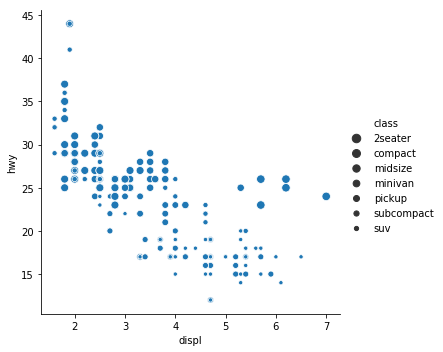

In [7]:
sns.relplot(x="displ",y="hwy", size="class", data=mpg);

Or we could have mapped `class` to the style aesthetic, which controls the shape of the points.

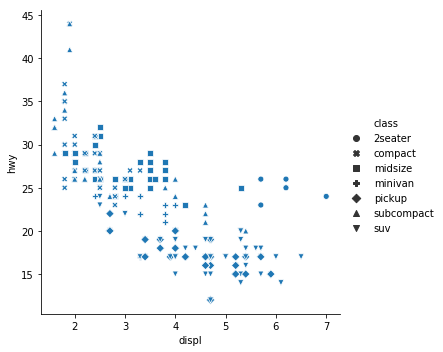

In [8]:
sns.relplot(x="displ",y="hwy", style="class", data=mpg);

The syntax highlights a useful insight about x and y: the x and y locations of a point are themselves aesthetics, visual properties that you can map to variables to display information about the data.

Once you map an aesthetic, seaborn takes care of the rest. It selects a reasonable scale to use with the aesthetic, and it constructs a legend that explains the mapping between levels and values. For x and y aesthetics, seaborn does not create a legend, but it creates an axis line with tick marks and a label. The axis line acts as a legend; it explains the mapping between locations and values.

You can also set the aesthetic properties of your geom manually. For example, we can make all of the points in our plot red:

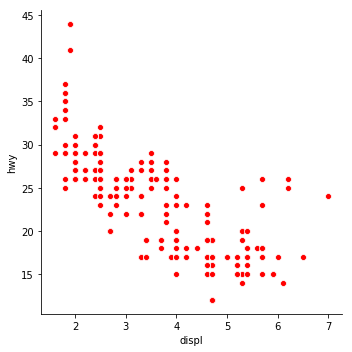

In [9]:
sns.relplot(x="displ",y="hwy",color="red",data=mpg);

Here, the color doesn’t convey information about a variable, but only changes the appearance of the plot. To set an aesthetic manually, set the aesthetic by name as an argument of your geom function. You’ll need to pick a level that makes sense for that aesthetic:

- The name of a color as a character string.

??The size of a point in mm.

- The style of a point as a string.

### Exercises

1. Which variables in `mpg` are categorical? Which variables are continuous? How can you see this information when you run`mpg`?

1. Map a continuous variable to `hue`, `size`, `style`. How do these aesthetics behave differently for vategorical vs. continuous variables?

1. What happens if you map the same variable to multiple aesthetics?

## Facets

One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into facets, subplots that each display one subset of the data.

To facet your plot by a single variable, use `col` or `row`. The variable that you pass to `col` or `row` should be discrete.

`col_wrap` “Wrap” the column variable at this width, so that the column facets span multiple rows.

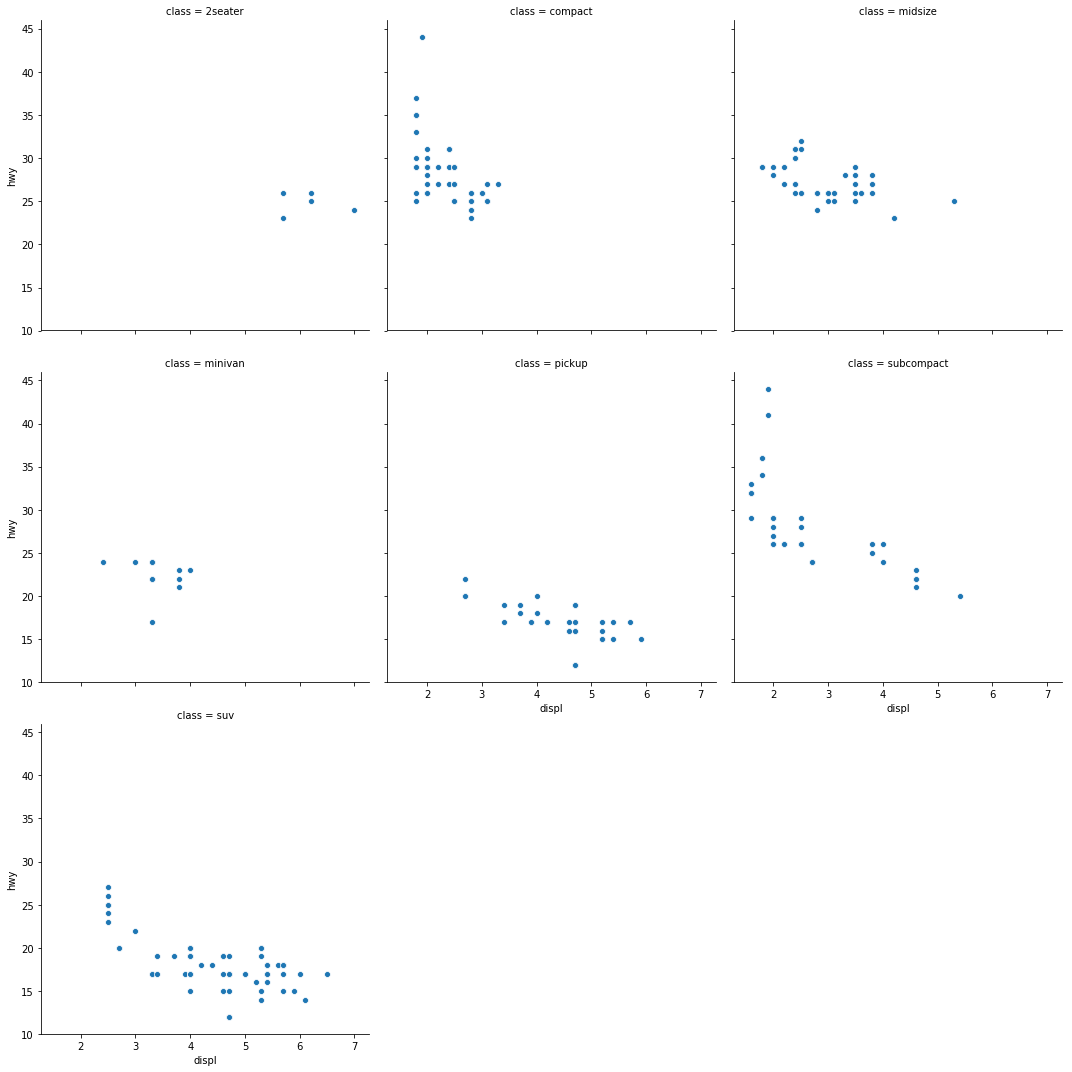

In [10]:
sns.relplot(x="displ", y="hwy", col = "class", col_wrap=3,data=mpg);

To facet your plot on the combination of two variables, add facet_grid() to your plot call. The first argument of facet_grid() is also a formula. This time the formula should contain two variable names separated by a ~.

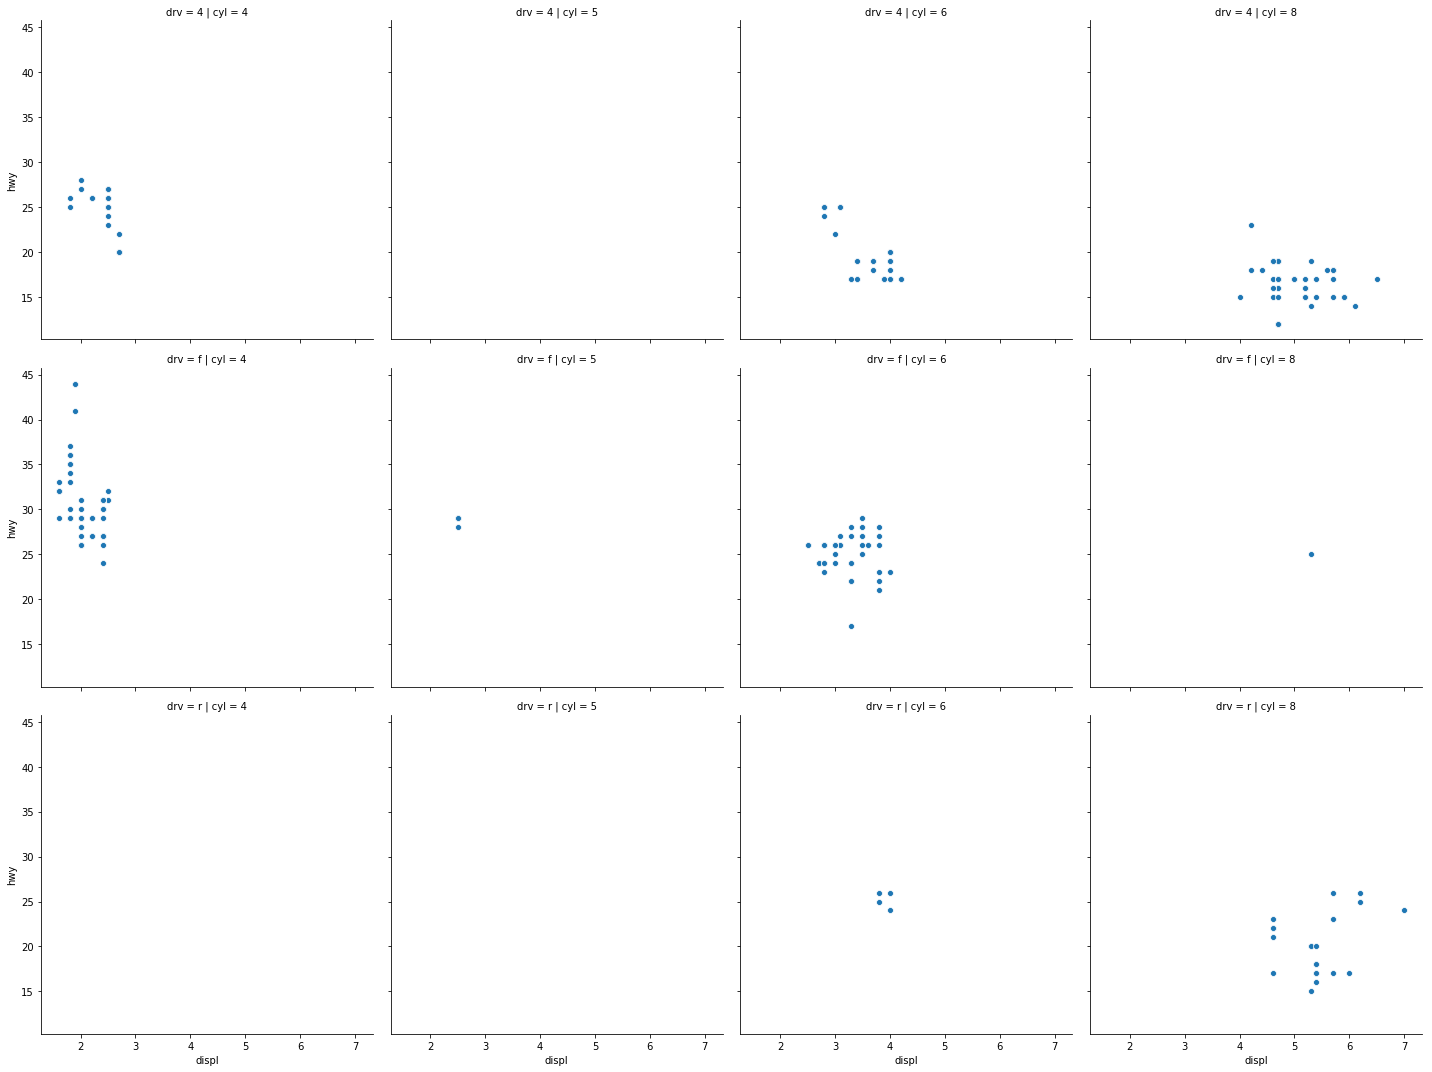

In [11]:
sns.relplot(x="displ", y="hwy", col = "cyl", row="drv",data=mpg);

### Exercises

1. What happens if you facet on a continuous variable?

1. What do the empty cells in plot with `col = "cyl", row="drv"` mean? How do they relate to this plot?
```python
sns.relplot(x="drv", y = "cyl", data=mpg);
```
1. What plots does the following code make?
```python
# A
sns.relplot(x="displ", y="hwy", row="drv", data=mpg);
# B
sns.relplot(x="displ", y="hwy", col = "cyl", data=mpg);
```
1. Take the first faceted plot in this section:
```python
sns.relplot(x="displ", y="hwy", col = "class" , col_wrap=2, data=mpg);
```
What are the advantages to useing faceting instead of the `hue` aesthetic? What are the disadvantages? How might the balance change if you had a larger dataset?

# Regression

How are these two plots similar?

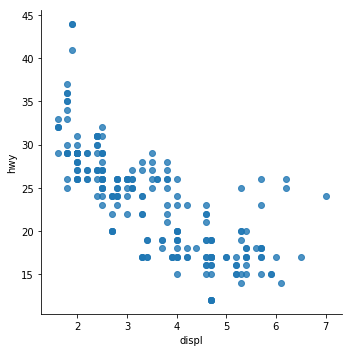

In [12]:
sns.lmplot(x="displ", y="hwy", fit_reg=False, data=mpg);

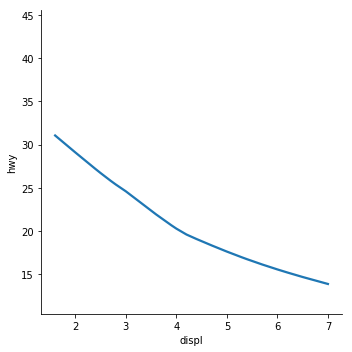

In [13]:
sns.lmplot(x="displ", y="hwy",scatter_kws={"s": 0}, lowess=True, data=mpg);

Both plots contain the same x variable, the same y variable, and both describe the same data. But the plots are not identical. Each plot uses a different visual object to represent the data.

A geom is the geometrical object that a plot uses to represent data. People often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on. Scatterplots break the trend; they use the point geom. As we see above, you can use different geoms to plot the same data. The plot on the left uses the point geom, and the plot on the right uses the smooth geom, a smooth line fitted to the data.

To change the geom in your plot, change the geom function that you add to ggplot(). For instance, to make the plots above, you can use this code:

```python
# Left
sns.lmplot(x="displ", y="hwy", fit_reg=False, data=mpg);

# Right
sns.lmplot(x="displ", y="hwy",scatter_kws={"s": 0}, lowess=True, data=mpg);
```

Every geom function in ggplot2 takes a mapping argument. However, not every aesthetic works with every geom. You could set the shape of a point, but you couldn’t set the “shape” of a line. On the other hand, you could set the linetype of a line. geom_smooth() will draw a different line, with a different linetype, for each unique value of the variable that you map to linetype.

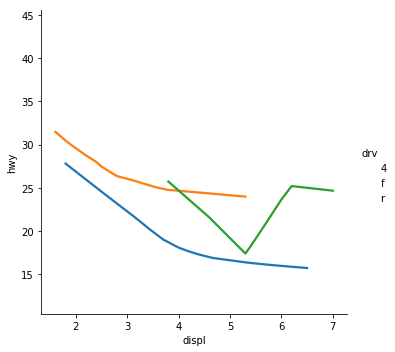

In [14]:
sns.lmplot(x="displ", y="hwy",scatter_kws={"s": 0}, lowess=True,hue="drv", data=mpg);

Here `hue` separates the cars into three lines based on their `drv` value, which describes a car’s drivetrain. One line describes all of the points with a `4` value, one line describes all of the points with an `f` value, and one line describes all of the points with an `r` value. Here, `4` stands for four-wheel drive, `f` for front-wheel drive, and `r` for rear-wheel drive.

If this sounds strange, we can make it more clear by overlaying the lines on top of the raw data and then coloring everything according to `drv`.

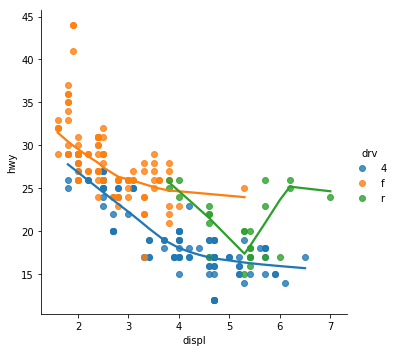

In [15]:
sns.lmplot(x="displ", y="hwy", lowess=True,hue="drv", data=mpg);

If this makes you excited, buckle up. We will learn how to place multiple geoms in the same plot very soon.

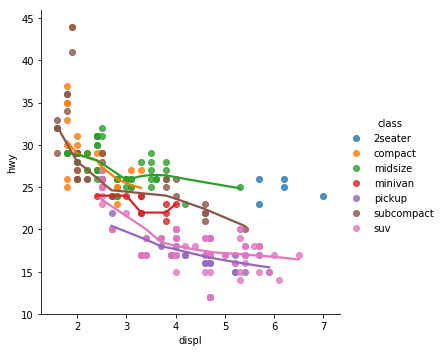

In [30]:
sns.lmplot(x="displ", y="hwy", lowess=True,hue="class", data=mpg);

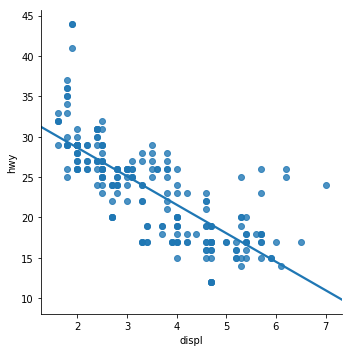

In [32]:
sns.lmplot(x="displ", y="hwy", ci=False,data=mpg);

### Exercises

1. What would you use to draw a line chart? Boxplot? Histogram? Area chart?

1. What does `legend = False` do? What happens if you remove it? Why do you think we would use it?

1. What does `ci` argument do? What happens if we set it to `False` in an `lmplot`?

1. Recreate the cod enecessary to generate the following graphs:

    1. ![]()
    1. ![]()
    1. ![]()
    1. ![]()
    1. ![]()
    1. ![]()

# Categorical

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between relplot() and either scatterplot() or lineplot(), there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

There are several types of Categorical plots:

1. Categorical scatterplots
    1. strip
    1. swarm
1. Categorical distribution plots
    1. boxplot
    1. violin
1. Categorical estimate plots
    1. bar
    1. count

## Scatterplots
The default representation of the data in `catplot()` uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

### Strip

### Swarm


## Distribution

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

### Boxplot

### Violinplot



## Estimate

Next, let’s take a look at a bar chart. Bar charts seem simple, but they are interesting because they reveal something subtle about plots. Consider a basic bar chart, as drawn with `catplot`. The following chart displays the total number of diamonds in the diamonds dataset, grouped by cut. The diamonds dataset comes in `seaborn` and contains information about ~54,000 diamonds, including the price, carat, color, clarity, and cut of each diamond. The chart shows that more diamonds are available with high quality cuts than with low quality cuts.

### Bar

### Count

In [34]:
diamonds = sns.load_dataset('diamonds')

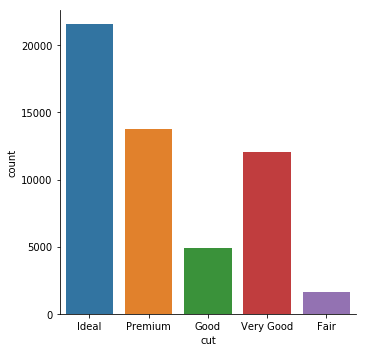

In [42]:
sns.catplot(x="cut", kind="count",data=diamonds);

On the x-axis, the chart displays `cut`, a variable from `diamonds`. On the y-axis, it displays `count`, but count is not a variable in diamonds! Where does count come from? Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot:

- bar charts, histograms, and frequency polygons bin your data and then plot bin counts, the number of points that fall in each bin.

- smoothers fit a model to your data and then plot predictions from the model.

- boxplots compute a robust summary of the distribution and then display a specially formatted box.
